In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gudhi as gd
import gudhi.weighted_rips_complex

In [3]:
distance_matrix = pd.read_csv("dmv_Symmetric_Distance_Matrix.csv", index_col=0).values
wait_vector = np.genfromtxt("dmv_office_details_walkin.csv", delimiter=",")

In [4]:
# Create the weighted Vietoris–Rips complex
cpx = gd.weighted_rips_complex.WeightedRipsComplex(
    distance_matrix=distance_matrix,
    weights=wait_vector
).create_simplex_tree(max_dimension=2)  # computes up to 1D homology

In [5]:
# Compute persistent homology
cpx.compute_persistence()

# Extract birth/death pairs
ph = cpx.persistence()

# Convert birth/death times from seconds to minutes (more interpretable)
ph_minutes = [(dim, (b/60, d/60)) for dim, (b, d) in ph if d < float("inf")]

In [6]:
walkin_wait_vector = np.genfromtxt("dmv_office_details_walkin.csv", delimiter=",")
walkin_wait_vector = np.nan_to_num(walkin_wait_vector, nan=0.0)


In [7]:
# Optionally clip to something reasonable, e.g., 0–180 minutes
walkin_wait_vector = np.clip(walkin_wait_vector, 0, 180)

In [8]:
ph_minutes = [(dim, (b/60, d/60 if d < float("inf") else None)) for dim, (b, d) in ph]

In [9]:
cpx_walkin = gd.weighted_rips_complex.WeightedRipsComplex(
    distance_matrix=distance_matrix,
    weights=walkin_wait_vector
).create_simplex_tree(max_dimension=2)


In [10]:
cpx_walkin.compute_persistence()
ph_walkin = cpx_walkin.persistence()
ph_minutes_walkin = [(dim, (b/60, d/60)) for dim, (b, d) in ph_walkin if d < float("inf")]


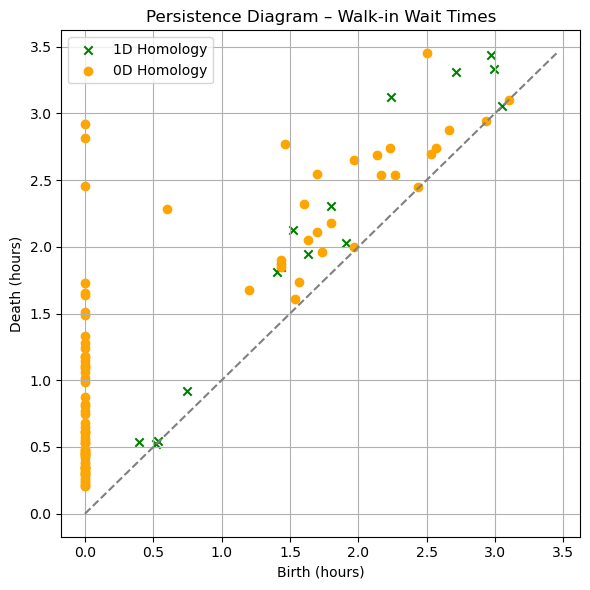

In [11]:
plt.figure(figsize=(6, 6))

for dim, (b, d) in ph_minutes_walkin:
    if dim == 0:
        plt.scatter(b, d, color='orange', label='0D Homology' if '0D Homology' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif dim == 1:
        plt.scatter(b, d, color='green', marker='x', label='1D Homology' if '1D Homology' not in plt.gca().get_legend_handles_labels()[1] else "")

# Diagonal reference
max_val = max(d for _, (_, d) in ph_minutes_walkin)
plt.plot([0, max_val], [0, max_val], linestyle='--', color='gray')

plt.xlabel("Birth (hours)")
plt.ylabel("Death (hours)")
plt.title("Persistence Diagram – Walk-in Wait Times")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
